# Projet 1 : Marché immobilier de Boston, U.S.

## NOM :
    
## Prénom :

<br>

## Masters, Parcours transitoire « Approche interdisciplinaire en sciences des données »

### UE D1 « Préparation et exploration des données »

### 2020-2021

<br>

**Instructeurs : Yves-André Chapuis, Xavier Dolques**

___

# 1. Modalités

## 1.1. Objectif du projet

L'objectif de ce projet est de synthétiser l'**`Analyse Exploratoire des Données (AED)`** qui a été réalisée dans ce Notebook sur le marché immobilier de la ville de Boston aux Etats-Unis. 

Qu'est qu'une **`AED`** ?

Plus connue sous la terminoligie en anglais *Exploratory Data Analysis* (*EDA*), l'**`AED`** est une approche d'analyse des ensembles de données pour résumer leurs principales caractéristiques, souvent à l'aide de graphiques statistiques et d'autres méthodes de visualisation des données.

Grace à plusieurs techniques de traitement, l'**`AED`** permet de :
    
- maximiser la visibilité sur un ensemble de données;
- découvrir la structure sous-jacente;
- extraire des variables importantes; 
- détecter les valeurs aberrantes et les anomalies;
- tester les hypothèses sous-jacentes;
- déterminer les paramètres de facteur optimaux.

## 1.2. Travail demandé

### 1.2.1. A faire

1. Analysez chaque section de ce Notebook et commentez ce que ces sections apportent à la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis. 
<br>Vous n'êtes pas obliger de travailler toutes les sections. 
<br>Allez à votre rythme !   
<br>
2. Apportez des compléments visuels à ses données si vous souhaitez mettre l'accent sur certaines particularités de cette étude.

### 2.1.2. A remettre

- Remettre votre fichier Notebook avec le travail demandé avant la séance suivante, soit le **vendredi 16/4**.
- Intitulé votre fichier Notebook : **`NOM_Prénom_PROJET1.ipynb`**
- Déposition le fichier Notebook sur Moddle dans le dossier **"Boston"**.

## 1.3. Évaluation

### 1.3.1. Compte-rendu

Une note moyenne de vos compte-rendus sera utilisée comme BONUS sur la note finale de Travaux Pratiques (TP) :
- + 2 : Excellent
- + 1 : Bien à Très Bien
- 0 : Neutre
- 1 : Retard ou Faible
- 2 : Pas de rendu

### 1.3.2. Examen TP

Un examen de Travaux Pratiques (TP) est prévu lors de la dernière séance. 
<br>
Cet examen sera basé sur les projets abordés.
<br>
A noter que les éléments de correction des projets seront fornis après chaque rendu.

____

# 2. Projet

## 2.1. Préparation des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle as pkl

In [3]:
boston = pkl.load(open('boston_housing.pkl', 'rb'))

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
data = boston.data

In [9]:
data.shape

(506, 13)

In [10]:
data = pd.DataFrame(data = data, columns=boston.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de préparation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.2. Comprendre les données

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
data_desc = data.describe()
data_desc.loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [16]:
data.duplicated().sum()

0

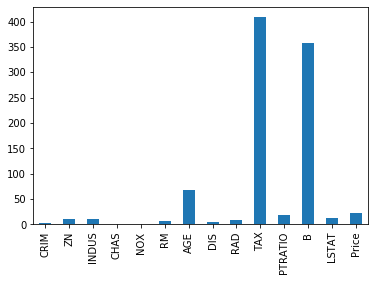

In [17]:
data_desc.loc['mean'].plot.bar()

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de préparation et de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.3. Style de tracé

In [18]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [19]:
len(plt.style.available)

26

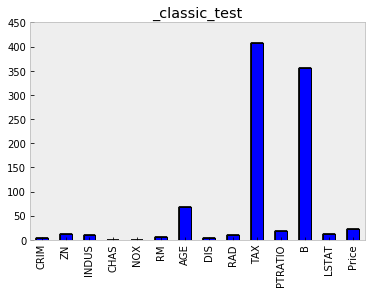

In [20]:
for style in plt.style.available:
    plt.style.use(style)
    data_desc.loc['mean'].plot.bar()
    plt.title(style)
    plt.savefig('plots/' + style + ".png")

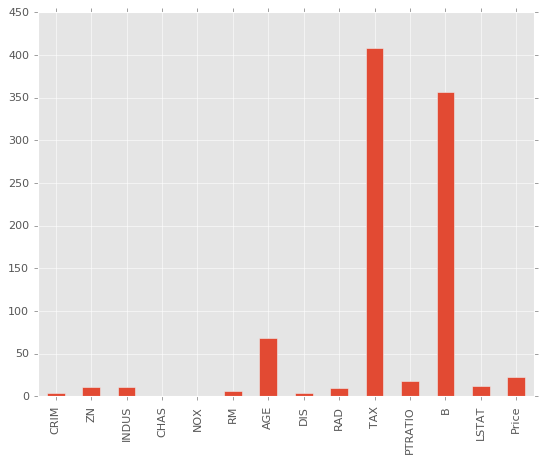

In [21]:
plt.style.use('ggplot')
data_desc.loc['mean'].plot.bar()

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.4. Graphique par paire

In [22]:
import seaborn as sns

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


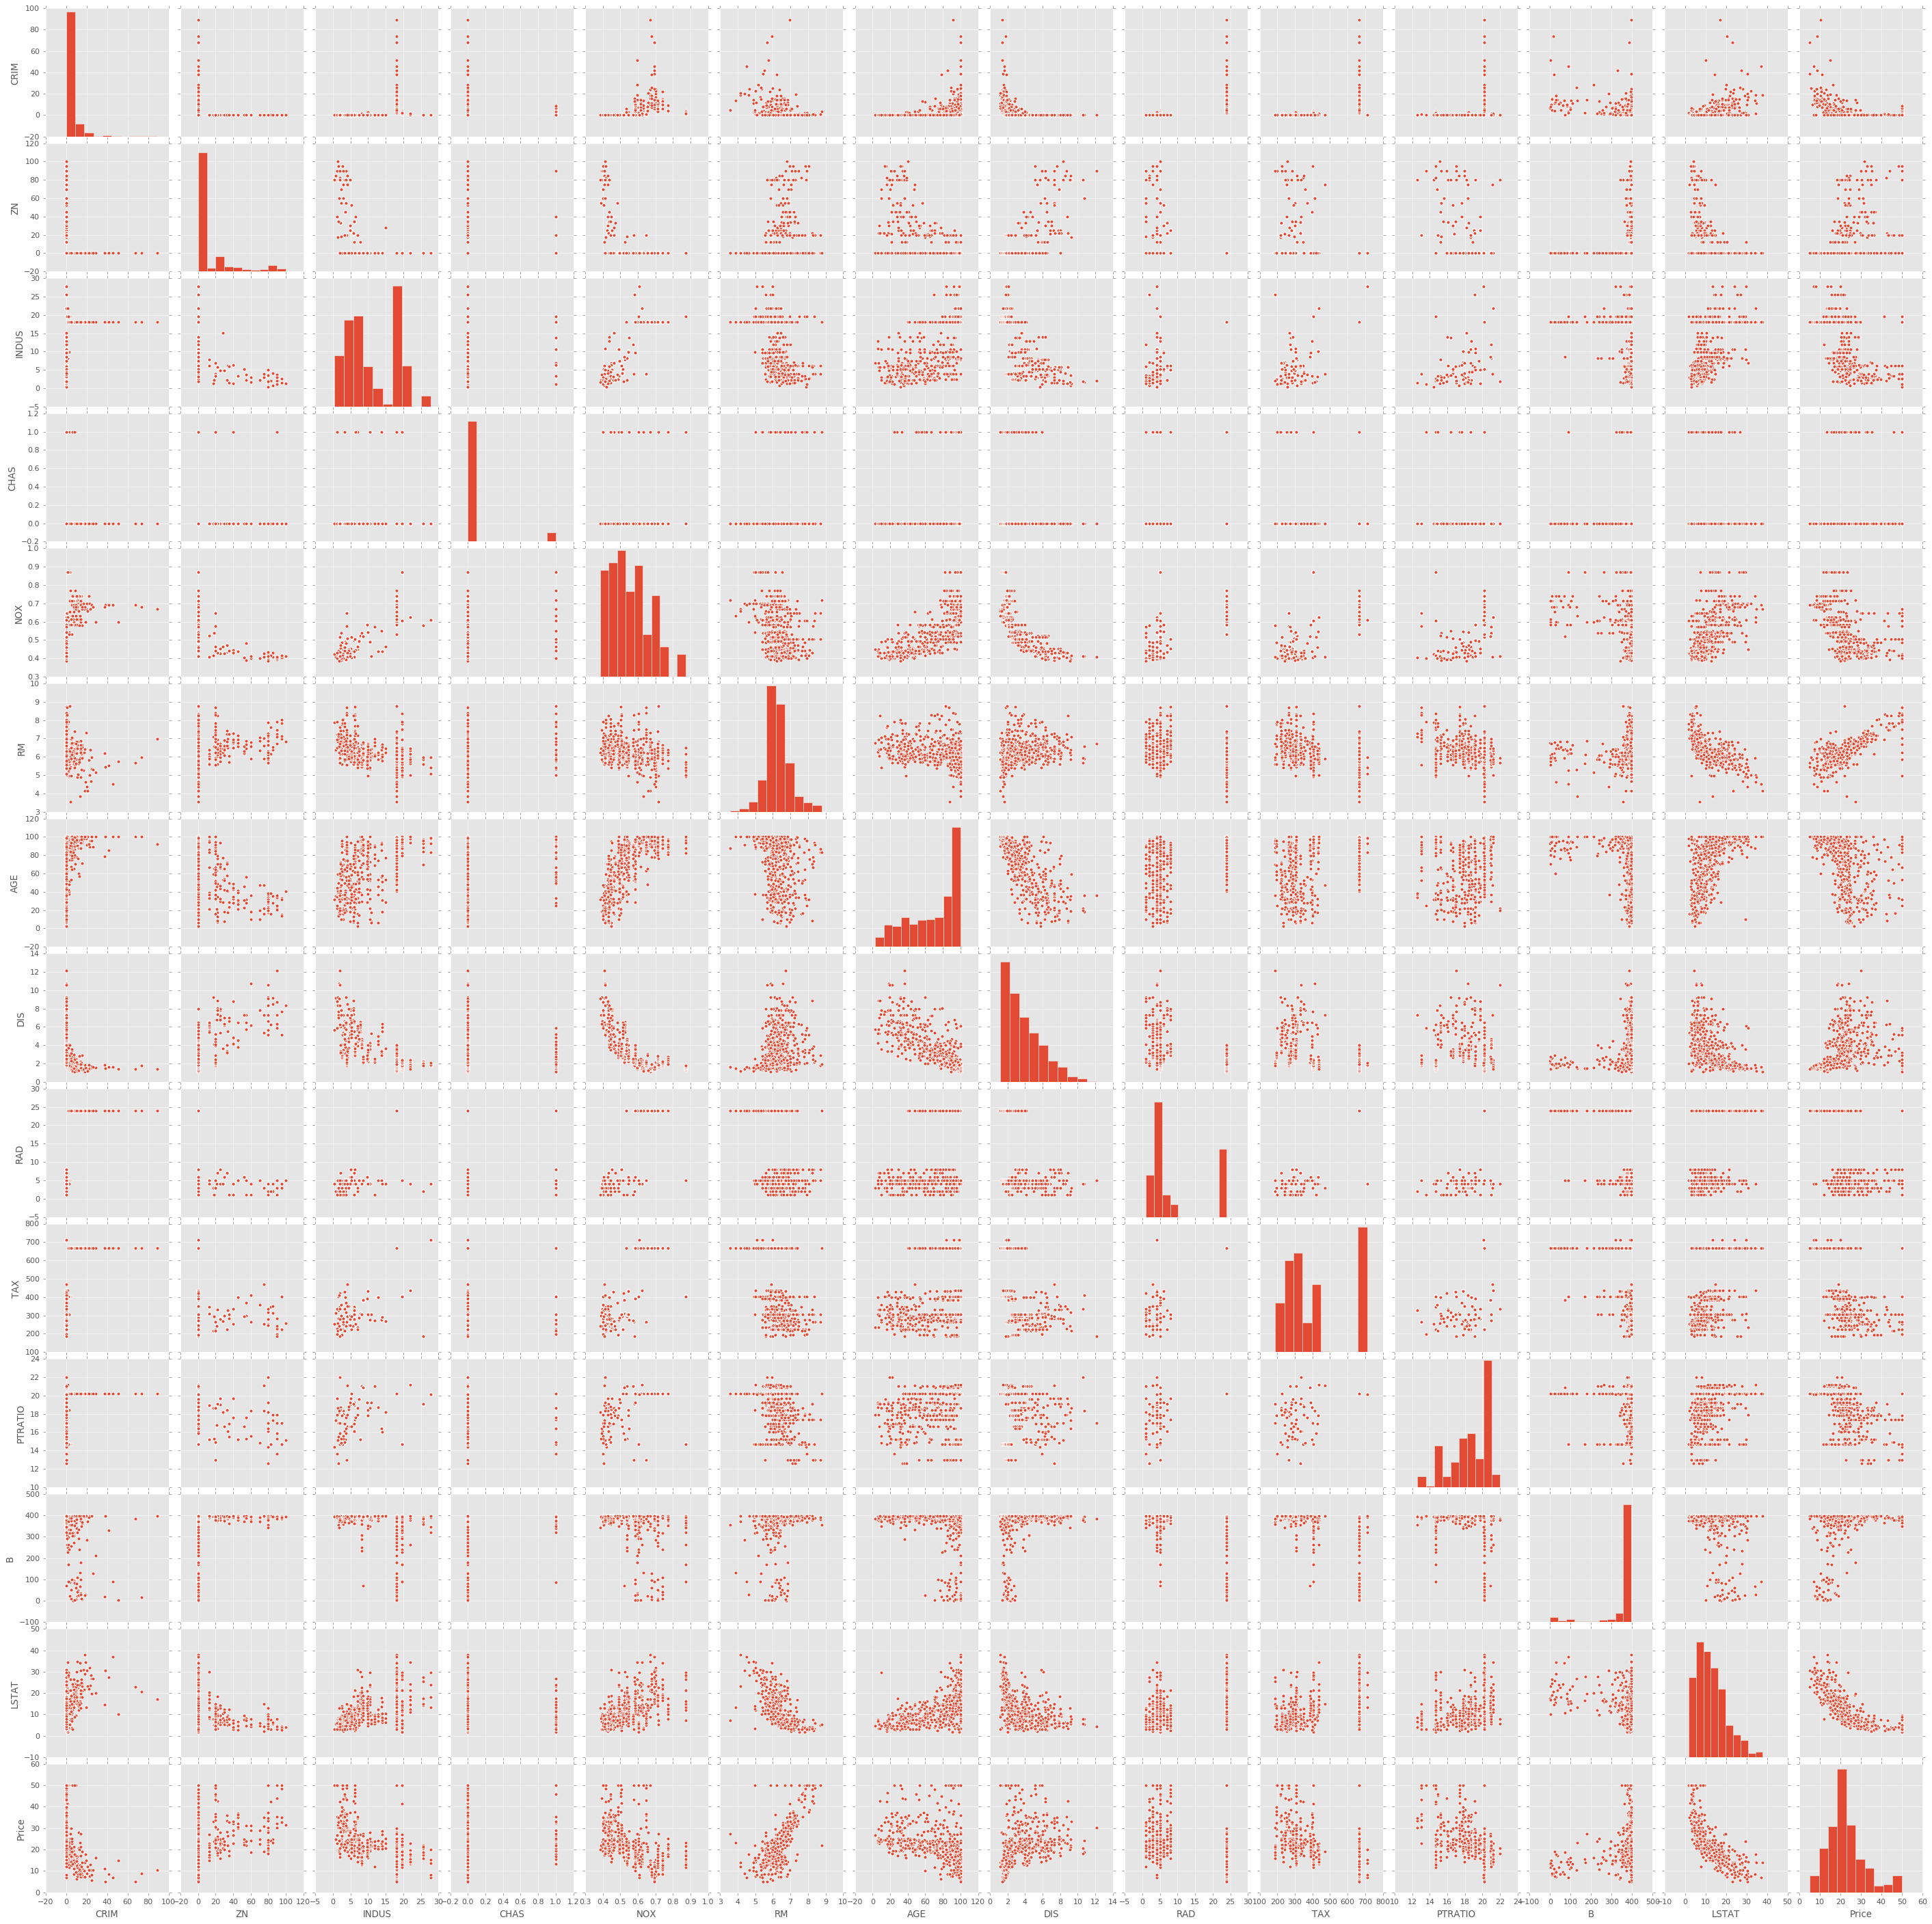

In [24]:
sns.pairplot(data)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

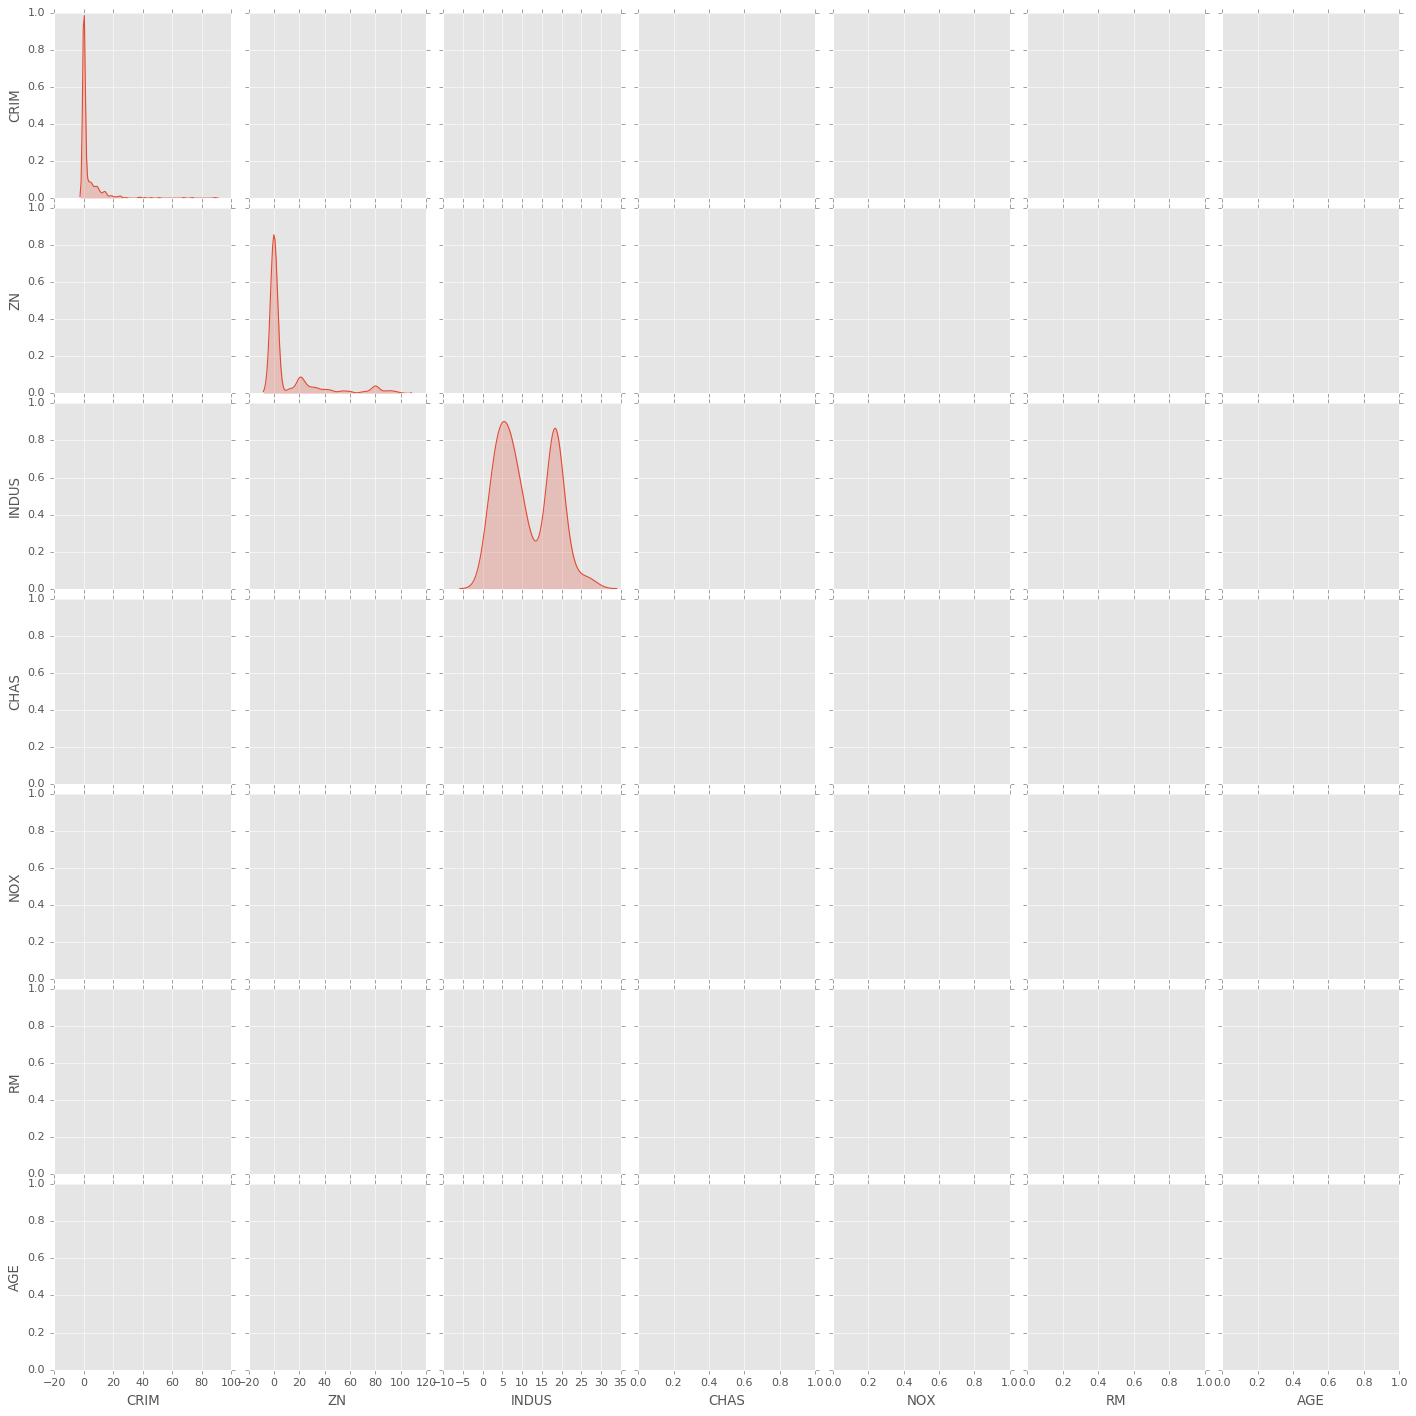

In [25]:
sns.pairplot(data.iloc[:, np.hstack(([0], range(1, 7)))], diag_kind='kde')

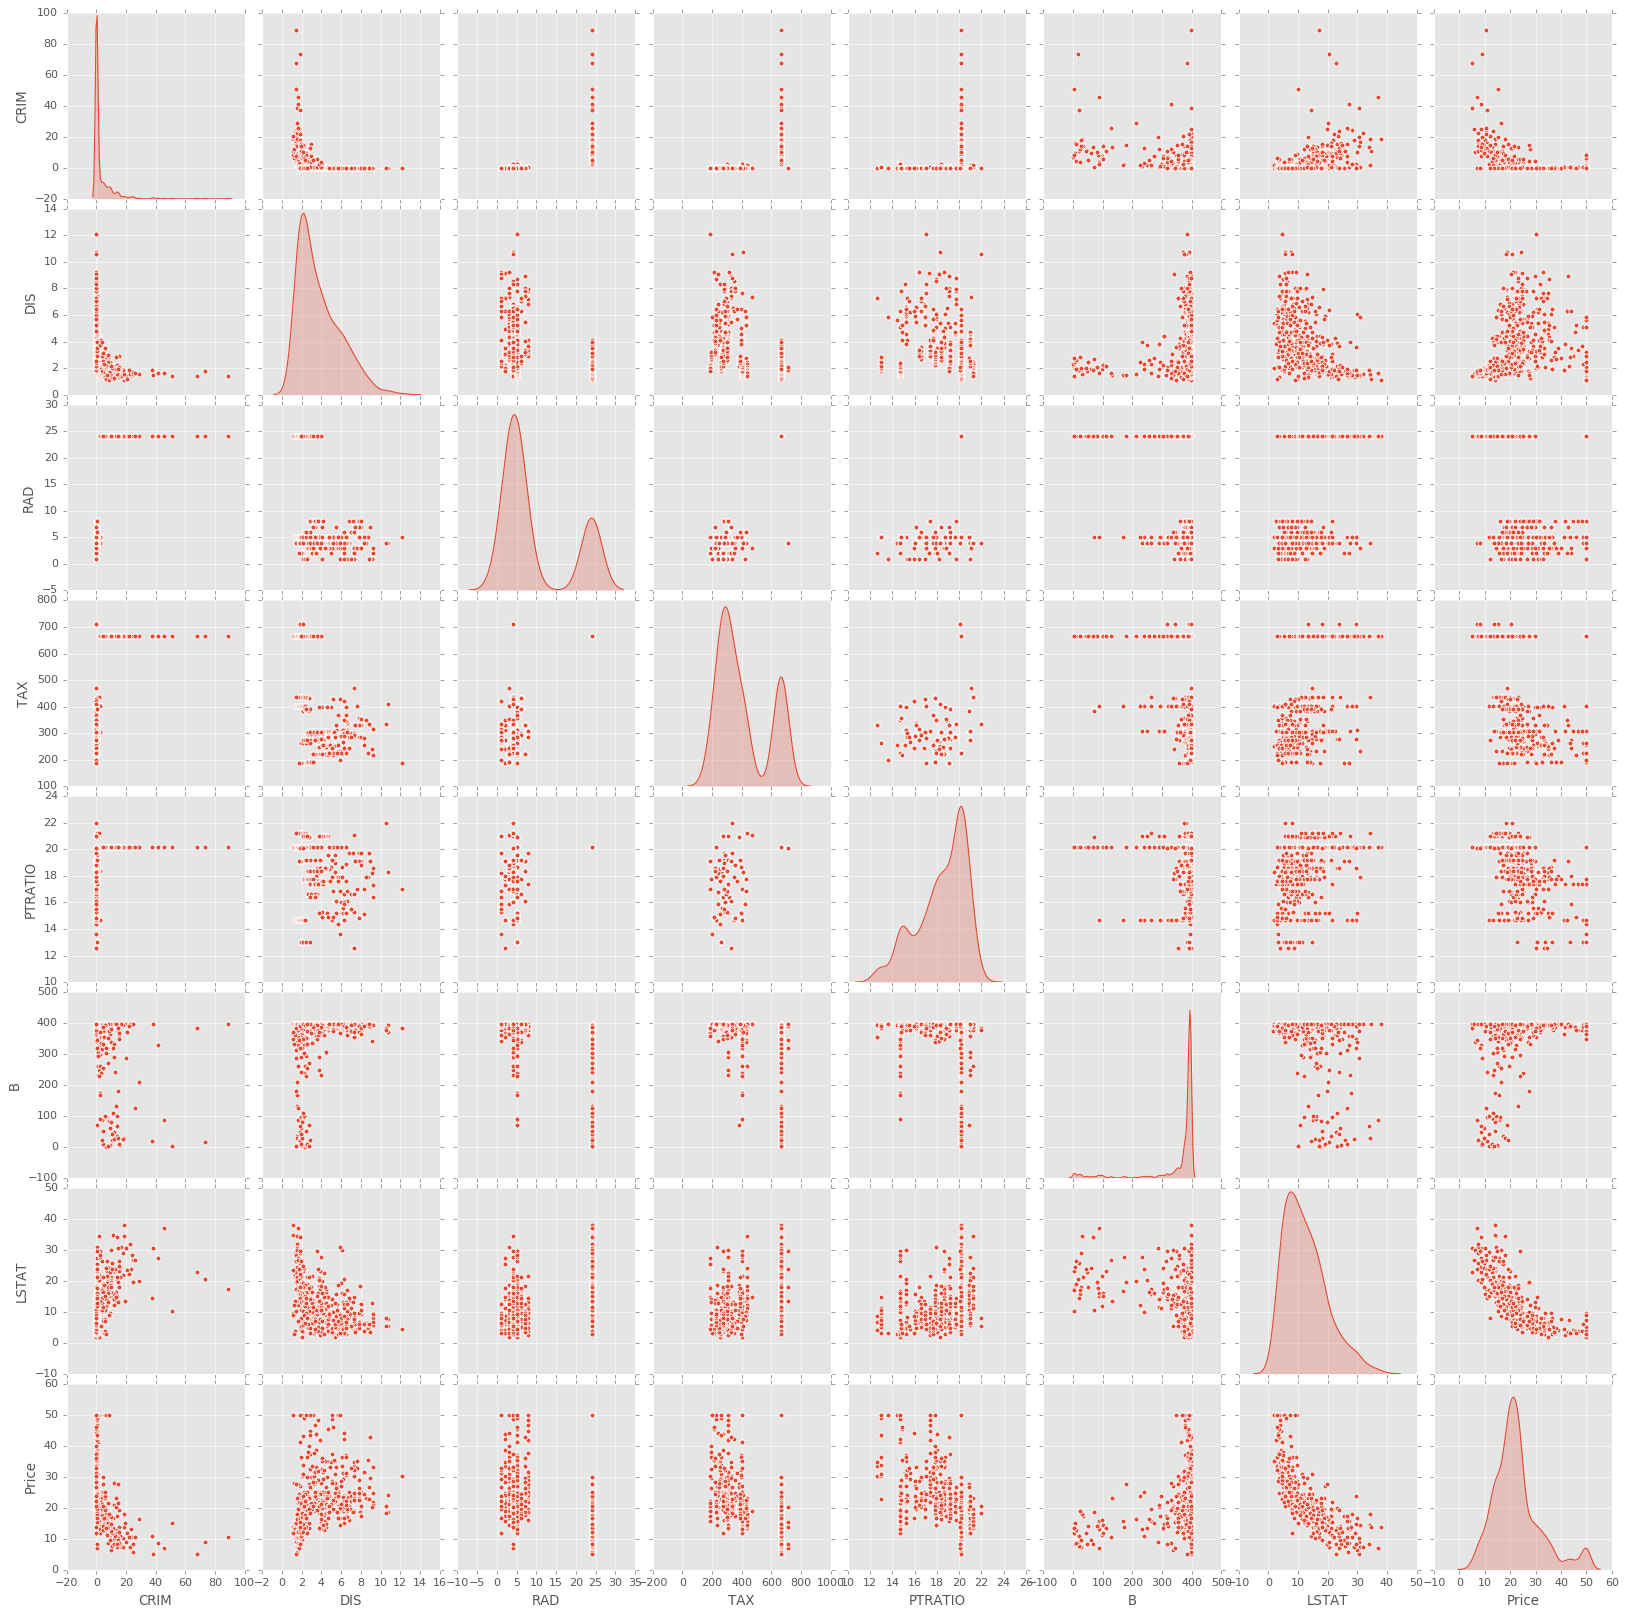

In [26]:
sns.pairplot(data.iloc[:, np.hstack(([0], range(7, 14)))], diag_kind='kde')

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?
<br>

- ***Pouvez vous corriger les défauts de programmation qui apparaît dans une cellule ?***



## 2.5. Diagramme de distribution

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

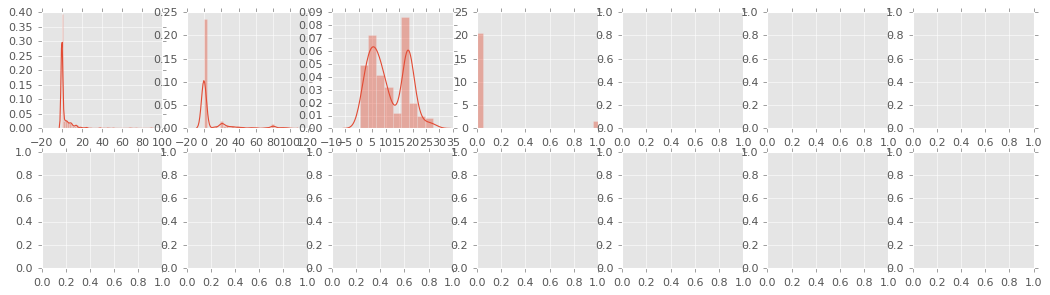

In [27]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (16, 4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()

## COMMENTAIRES
<br>

- ***Pouvez vous corriger les défauts de programmation qui apparaît dans la cellule ?***
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.6. Nuage de points

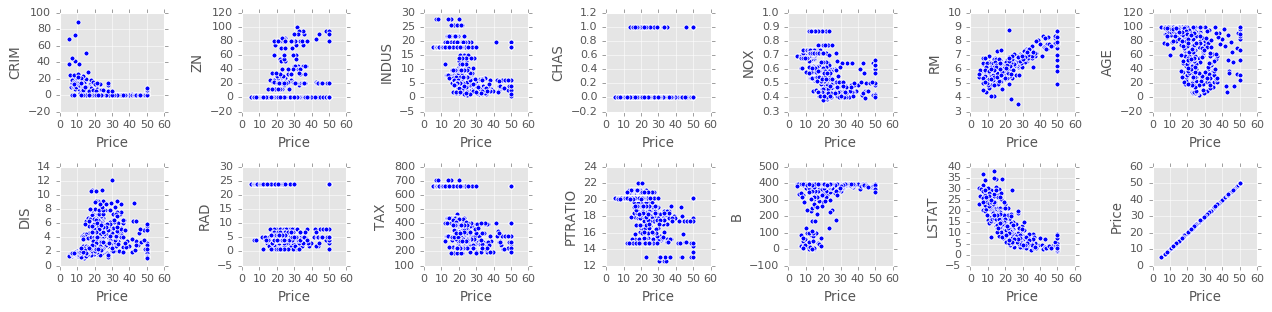

In [28]:
rows = 2
cols = 7

fig, ax = plt.subplots(rows, cols, figsize = (16, 4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = 'Price', y = col[index], data = data, ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()
plt.show()

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.7. Heatmap

In [29]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [30]:
corrmat.shape

(14, 14)

In [31]:
import matplotlib
matplotlib.__version__

'3.1.3'

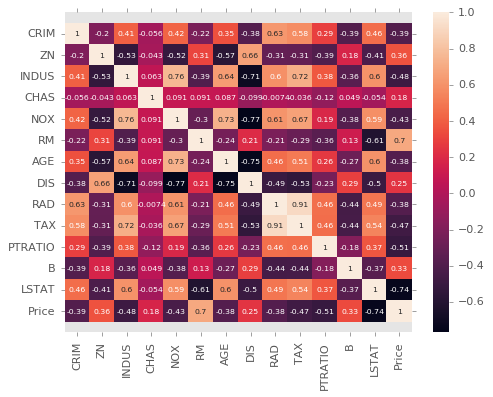

In [32]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-.5)
plt.show()

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.8. Sélection de caractéristiques corrélées

In [33]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [34]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index=feature, columns=['corr value'])
    
    return df

In [35]:
threshold = 0.5
corr_df = getCorrelatedFeature(corrmat['Price'], threshold)

In [36]:
corr_df

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de traitement des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.9. Heatmap et graphique par paire de données corrélées

In [37]:
correlated_data = data[corr_df.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


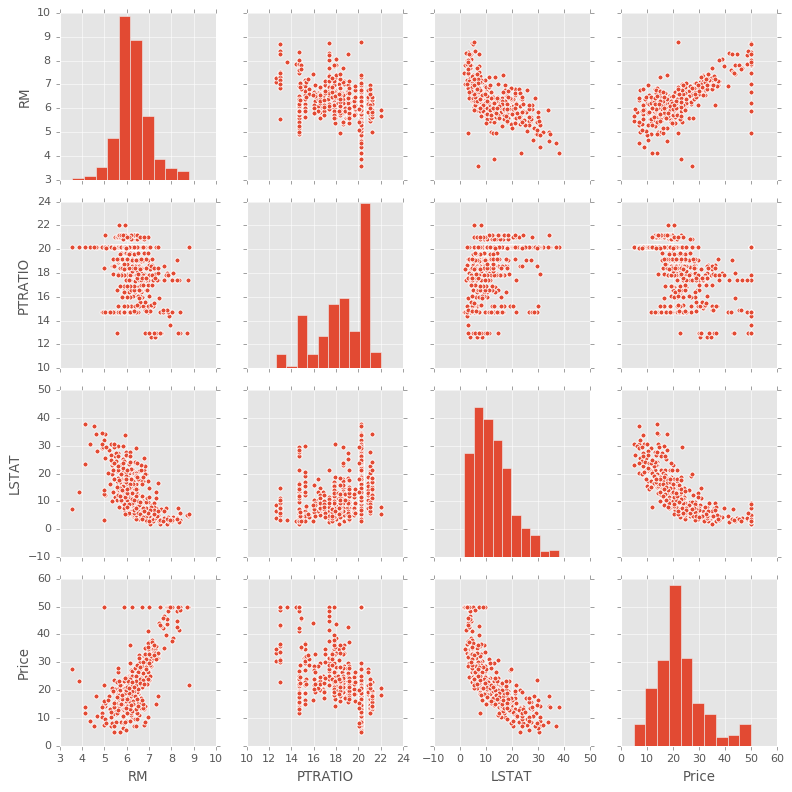

In [38]:
sns.pairplot(correlated_data)
plt.tight_layout()

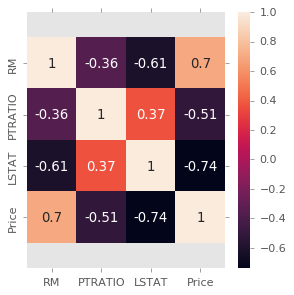

In [39]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size': 12})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.10. Box and Rel Plot 

**Reminder**

    Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

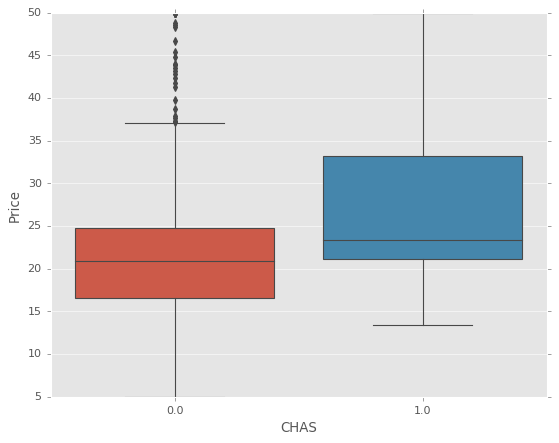

In [40]:
sns.boxplot(y = 'Price', x = 'CHAS', data = data)

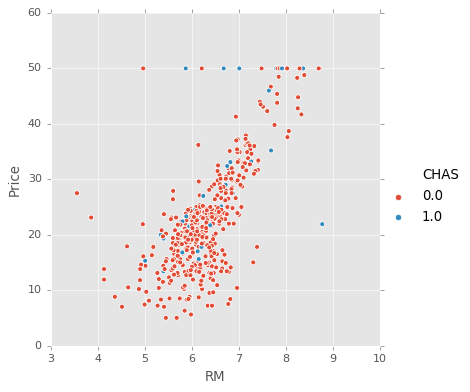

In [41]:
sns.relplot(x = 'RM', y = 'Price', data = data, hue = 'CHAS')

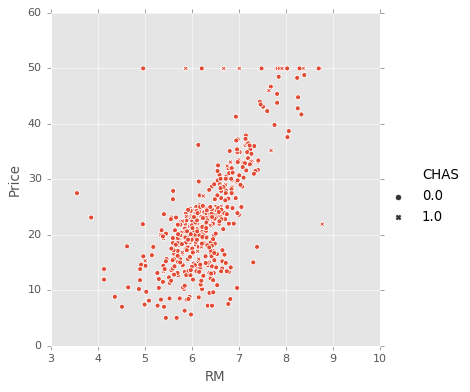

In [42]:
sns.relplot(x = 'RM', y = 'Price', data = data, style = 'CHAS')

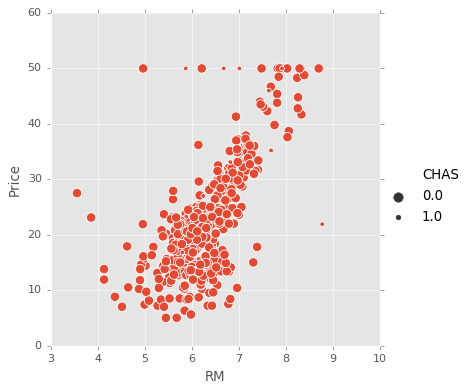

In [43]:
sns.relplot(x = 'RM', y = 'Price', data = data, size = 'CHAS')

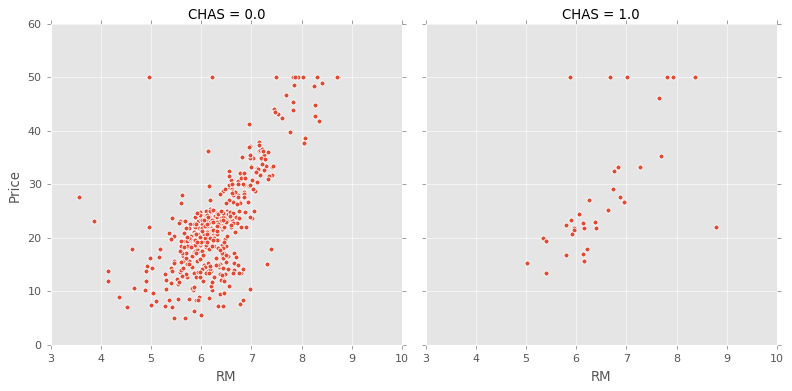

In [44]:
sns.relplot(x = 'RM', y = 'Price', data = data, col = 'CHAS')

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

## 2.11. Joint Plot 

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed

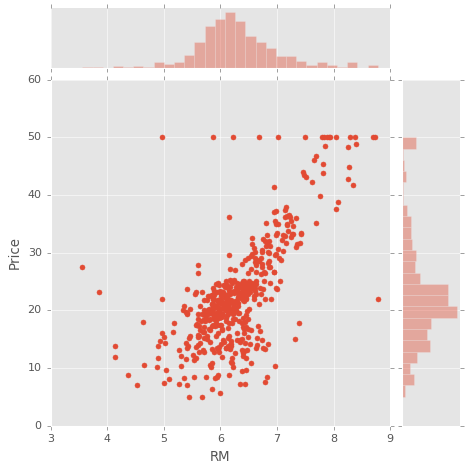

In [45]:
sns.jointplot(x = data['RM'], y = data['Price'])

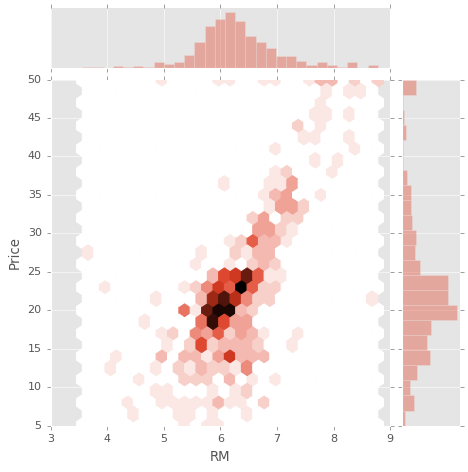

In [46]:
sns.jointplot(x = data['RM'], y = data['Price'], kind = 'hex')

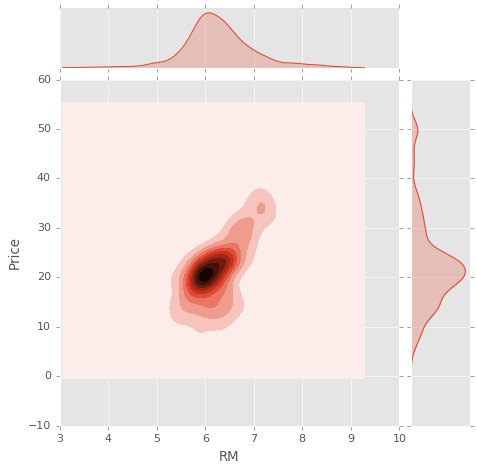

In [47]:
sns.jointplot(x = data['RM'], y = data['Price'], kind = 'kde')

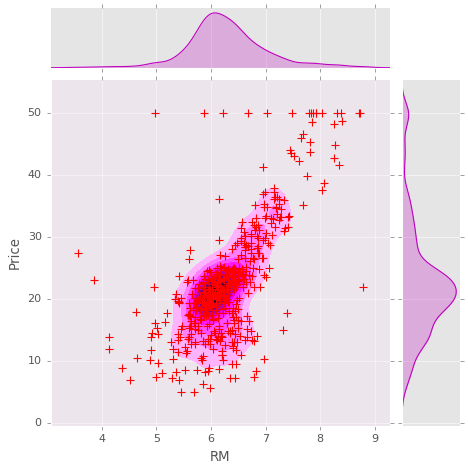

In [48]:
g = sns.jointplot(data['RM'], data['Price'], kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'r', s = 40, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0.3)

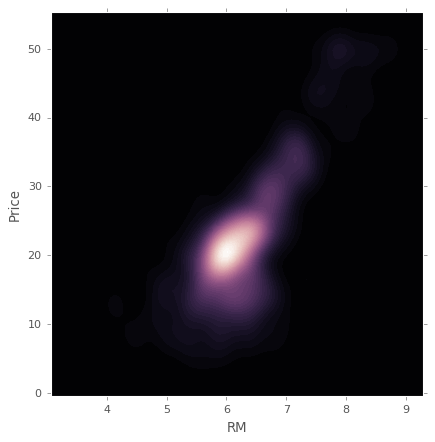

In [49]:
fig, ax = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(data['RM'], data['Price'], cmap = cmap, n_levels = 60, shade = True)

## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

# 3. Régression linéaire

Nous n'avons pas aborder la régresssion linéaire dans le cours de la matière. 

Par contre, nous allons présenter quelques éléments de définition et de visualisation de ce concept et essayez de les commenter dans le cas du ma prix marché immobilier de la ville de Boston aux Etats-Unis.

## 3.1. Définition

La régression est une mesure statistique utilisée en finance, mais aussi dans d’autres disciplines scientifiques pour tenter de déterminer la force de la relation entre une variable dépendante (habituellement désignée par Y) et une série d’autres variables changeantes (appelées variables indépendantes).

## 3.2. Utilisation de la régression linéaire

- En finance, la régression est un outil d’aide à la décision pour effectuer certains placements. Elle permet d’évaluer les actifs et de comprendre les relations entre les différentes variables, notamment pour comprendre quels sont les facteurs principaux qui pèsent sur la détermination d’un prix. Ainsi, souvent, la variable dépendante Y correspond au prix, tandis que les variables X sont des facteurs susceptibles de modifier le prix, comme par exemple des taux d’intérêt. Plus ce coefficient est important en valeur absolu, plus il est susceptible de faire varier le prix.
<br>

- Techniquement, cette droite est tracée entre les différents points qui font correspondre une valeur x et une valeur y dans un repère. Elle est tracée en utilisant la méthode des moindres carrés, c’est-à-dire en trouvant les coefficients de la droite de telle sorte que la somme des carrés des écarts entre chaque point original et le point de la droite qui passe par la même ordonnée soit minimisée. Des logiciels de traitement des données comme Excel calculent très rapidement ces coefficients à partir d’un jeu de données.
<br>

- Cette « approximation moyenne » est très représentative de la situation et de l’évolution des prix lorsque les points sont rapprochés et dessinent une tendance, mais il est parfois plus difficile d’obtenir une courbe de tendance très représentative de la situation lorsque les données sont plus éclatées.

## 3.3. Etude par régression linéaire du prix de l'immobilier à Boston, U.S.

Pour générer la droite de régression linéaire, nous allons utiliser les fonctions du package **`seaborn`** suivantes :

- regplot()
- lmplot()

In [50]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
sns.regplot(x = 'RM', y = 'Price', data = data, robust=True)

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data = data)

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data = data, hue = 'CHAS')

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS')

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS', robust=True)

In [ ]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS', order = 2)

sns.lmplot(x = 'CHAS', y = 'Price', data = data, x_estimator=np.mean)

In [ ]:
## <font color='red'>Commentaire (à compléter ici)</font>
<br>

- Quels sont les objectifs de cette section ?
<br>

- Quelles sont les outils de visualisation des données utilisés ?
<br>

- Qu'apportent cette section sur la connaissance sur le marché immobilier de la ville de Boston aux Etats-Unis ?

<br>

# END